In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.model_selection import GridSearchCV

In [2]:
boston_dataset = datasets.load_boston()

In [3]:
X_df = pd.DataFrame(boston_dataset.data)
X_fn = boston_dataset.feature_names
X_df.columns = X_fn

X_df = X_df.drop(['CHAS'], axis = 1)

y_df = pd.DataFrame(boston_dataset.target)
y_df.columns = ['MEDV']

In [4]:
X_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


# 1. Data Preprocessing-Outliers Removal

In [5]:
# feature scaling.

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X_df.values)

X_scaled_df = pd.DataFrame(X_scaled)

X_scaled_df.columns = X_df.columns

<AxesSubplot:>

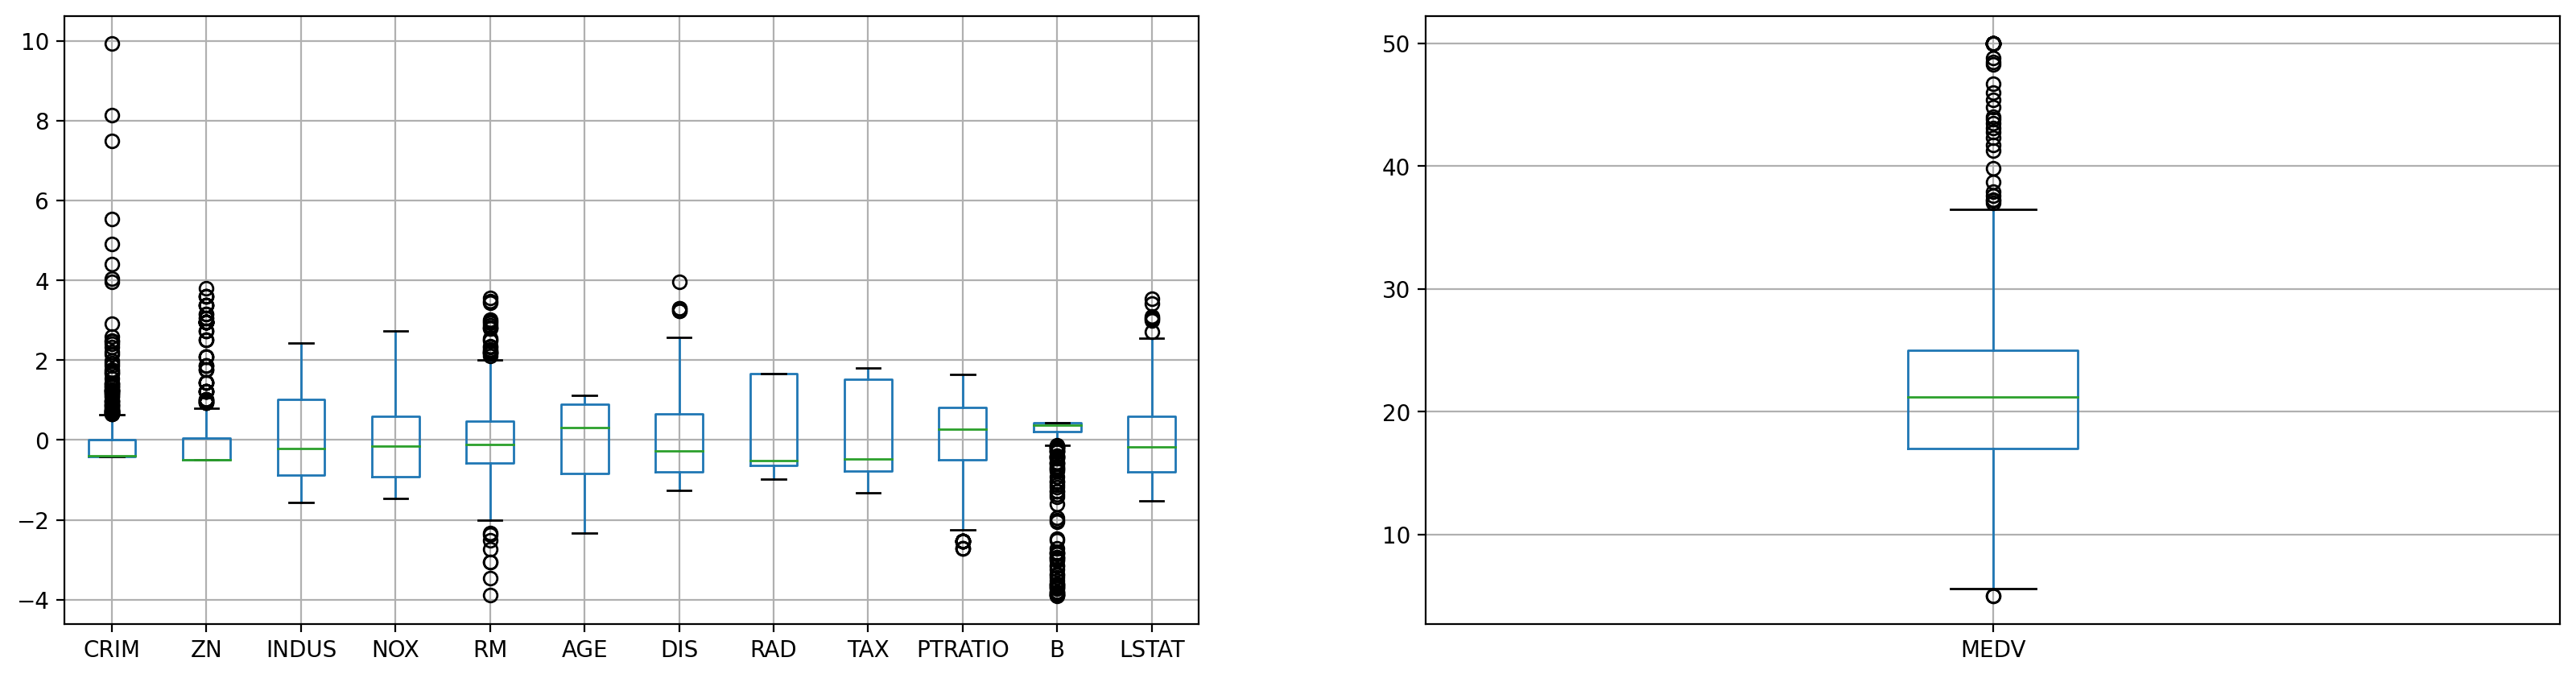

In [6]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_scaled_df.boxplot()

ax = fig.add_subplot(1,2,2)
y_df.boxplot()

In [7]:
# function to remove the outliers from the dataset (data which fall outside of the whiskers in the box plot)
# the outliers are removed for each feature separately. It can happen that data that are outliers
# for a certain feature are not outliers for another feature. 
# The threshold to consider data outliers or not is defined by q. 

# upper quartile or 75h percentile (Q3): value for which 75% of the data are less than this value (upper threshold of the box)
# lower quartile or 25th percentile (Q1): value for which 25% of the data are less than this value (lower theshold of the box)
# iqr: distance between the upper and lower quartile: Q3 - Q1

# upper whisker: Q3 + q*iqr
# lower whisler: Q1 - q*iqr

# data > upper whisker or < lower whisker : outliers

# q controls the amount of data to consider as outliers


def get_remove_outliers(X_df,y_df,q):
    
    data = np.column_stack((X_df.values,y_df.values))
    
    for j in range(data.shape[1]):
    
        median = np.median(data[:,j])
        
        upper_quartile = np.percentile(data[:,j], 75)
        lower_quartile = np.percentile(data[:,j], 25)

        iqr = upper_quartile - lower_quartile
        upper_whisker = (data[:,j][data[:,j] <= upper_quartile + q * iqr]).max()
        lower_whisker = (data[:,j][data[:,j] >= lower_quartile - q * iqr]).min()
        
        data_clean = data[data[:,j] <= upper_whisker]
        data_clean = data_clean[data_clean[:,j] >= lower_whisker]
        
        data = data_clean
        
        
    X_df_clean = pd.DataFrame(data_clean[:,:data_clean.shape[1] - 1])
    X_df_clean.columns = X_df.columns
    
    y_df_clean = pd.DataFrame(data_clean[:,data_clean.shape[1] - 1])
    y_df_clean.columns = ['MEDV']
    
    return X_df_clean,y_df_clean

In [8]:
# cleaning the dataset by removing outliers of each feature and target

q = 3

X_scaled_clean_df, y_clean_df = get_remove_outliers(X_scaled_df,y_df, q)

<AxesSubplot:>

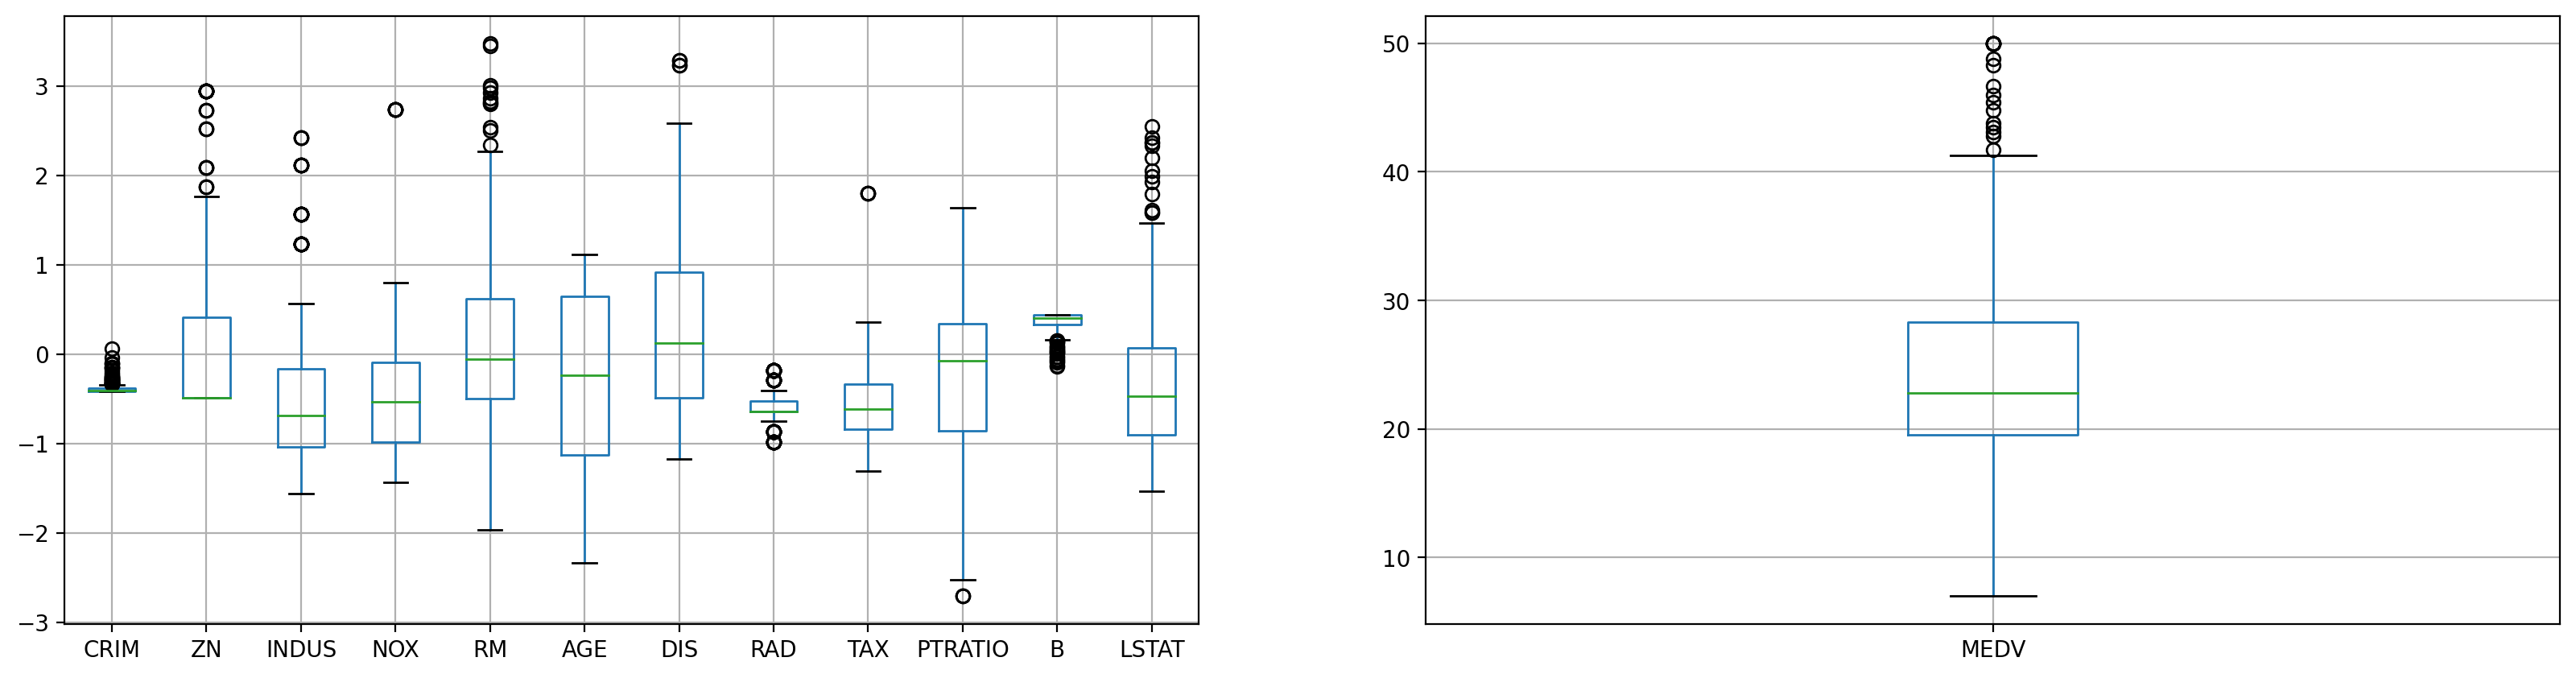

In [9]:
# features distribution after scaling

fig = plt.figure(figsize = (20,5), dpi = 200)

ax = fig.add_subplot(1,2,1)
X_scaled_clean_df.boxplot()

ax = fig.add_subplot(1,2,2)
y_clean_df.boxplot()

In [10]:
X_scaled_clean_df

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501
...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,0.387217,-0.418147
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,0.441052,-0.500850
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,0.441052,-0.983048
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,0.403225,-0.865302


In [11]:
# train - test split


X_train, X_test, y_train, y_test = train_test_split(X_scaled_clean_df, 
                                                    y_clean_df,
                                                    test_size = 0.33,
                                                    random_state=42)

In [12]:
import statsmodels.api as sm

# define a fucntion to perform backward selection

def backward_selection(X,y,alpha):
    
    # alpha: level of significance
    
    # set max p value to an arbitrary high number
    p_max = 1000
    
    # loop until max p value is higher than level of significance
    while (p_max > alpha):
    
        # fit the anove
        X_ANOVA = sm.add_constant(X)

        regressor_ANOVA = sm.OLS(endog = y,exog = X_ANOVA).fit()
        
        # get the p-values
        p_values = regressor_ANOVA.pvalues
    
        # find the max p value
        p_max = np.max(p_values)
   
        
        # drop the feature with the highest p-value
        p_max_index = np.where(p_values == p_max)[0][0]
        
        if p_max_index > 0:
            
            X = X.drop([X.columns[p_max_index - 1]], axis = 1)
                
    return X, regressor_ANOVA

# define function to calculate adjusted R2

def get_adj_R2(model,X,y):
    
    R2 = model.score(X,y)
    
    n = X.shape[0]
    p = X.shape[1]
    
    adj_R2 = 1 - (1 - R2)*(n - 1)/(n - p - 1)

    return adj_R2

# 2. Ridge (penalty with L2 norm)

In [13]:
alpha = 0.1 # shrinkage penalty coefficient in the Ridge Loss

            # L =  sum_i(yi - B0 - sum_j (BjXj)) + alpha * sum_j (Bj**2)
    
            # increasing alpha leads a reduction of the coefficients Bj towards 0
            # as the loss L is minimized only if Bj are minimized
            # increasing alpha leads to a less flexible model with a little bit higher bias
            # but a lower variance >>> bias-variance trade-off
            # alpha should be chosen with cross-validation
            # at this first step we use the default value
            
            
ridge = Ridge( alpha = alpha)


ridge.fit(X_train, y_train)


Ridge(alpha=0.1)

In [14]:
# fitting a normal linear regression to compare the coefficients

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [15]:
for i in range(X_train.shape[1]):

    B_ridge = ridge.coef_[0][i]
    B_lr = lr.coef_[0][i]
    
    fn = X_train.columns[i]
    
    print('Coefficient for feature {}: lr: {:.3f} - ridge: {:.3f}'.format(fn,B_ridge,B_lr))

Coefficient for feature CRIM: lr: 5.673 - ridge: 7.597
Coefficient for feature ZN: lr: 0.229 - ridge: 0.232
Coefficient for feature INDUS: lr: 0.379 - ridge: 0.378
Coefficient for feature NOX: lr: -0.529 - ridge: -0.675
Coefficient for feature RM: lr: 6.605 - ridge: 6.606
Coefficient for feature AGE: lr: -1.216 - ridge: -1.222
Coefficient for feature DIS: lr: -1.521 - ridge: -1.561
Coefficient for feature RAD: lr: 2.047 - ridge: 2.031
Coefficient for feature TAX: lr: -2.298 - ridge: -2.280
Coefficient for feature PTRATIO: lr: -1.287 - ridge: -1.271
Coefficient for feature B: lr: 0.496 - ridge: 0.659
Coefficient for feature LSTAT: lr: -0.526 - ridge: -0.527


In [16]:
train_R2 = get_adj_R2(ridge,X_train,y_train)
test_R2 =  get_adj_R2(ridge,X_test,y_test)

In [17]:
print('Ridge fit with alpha: {}'.format(alpha))
print('Train adj R2: {:.3f}'.format(train_R2))
print('Test adj R2: {:.3f}'.format(test_R2))

Ridge fit with alpha: 0.1
Train adj R2: 0.867
Test adj R2: 0.787


# 2.1 Tuning alpha with validation set approach

In [38]:
def get_best_regularizer(model_name,alpha_list,X_train,y_train,X_test,y_test):
        
    n_features = X_train.shape[1]
    B = np.zeros((len(alpha_list),n_features))
    
    trn_R2 = np.zeros((len(alpha_list)))
    tst_R2 = np.zeros((len(alpha_list)))
    
    
    best_test_R2 = 0
    
    for i in range(len(alpha_list)):
    
        
        alpha = alpha_list[i]
        
        if model_name == 'ridge':
        
            model = Ridge(alpha = alpha)
            
        if model_name == 'lasso':
            
            model = Lasso(alpha = alpha)
            
    
        
        model.fit(X_train, y_train)
        
        train_R2 = get_adj_R2(model,X_train,y_train)
        test_R2 = np.round(get_adj_R2(model,X_test,y_test),decimals=3)
        
        trn_R2[i] = train_R2
        tst_R2[i] = test_R2
        
        
        B[i,:] = model.coef_
    
        
        if test_R2 >= best_test_R2:
            
            best_test_R2 = test_R2
            
            best_alpha = alpha
            
    print('Best alpha: {}'.format(best_alpha))
    print('Best test R2: {}'.format(best_test_R2))
            
            
    fig=plt.figure(figsize=(10,10))
    
    plt.plot(alpha_list,trn_R2, 'blue')
    plt.plot(alpha_list,tst_R2, 'red')
    plt.xscale('log')
    plt.axvline(x = best_alpha)
    plt.legend(['train','test'])
            
    fig=plt.figure(figsize=(10,10))
    
    plt.plot(alpha_list,B, 'o--')
    plt.xscale('log')
    plt.axvline(x = best_alpha)
    plt.legend(X_train.columns)
            
             
        

Best alpha: 0.01
Best test R2: 0.789


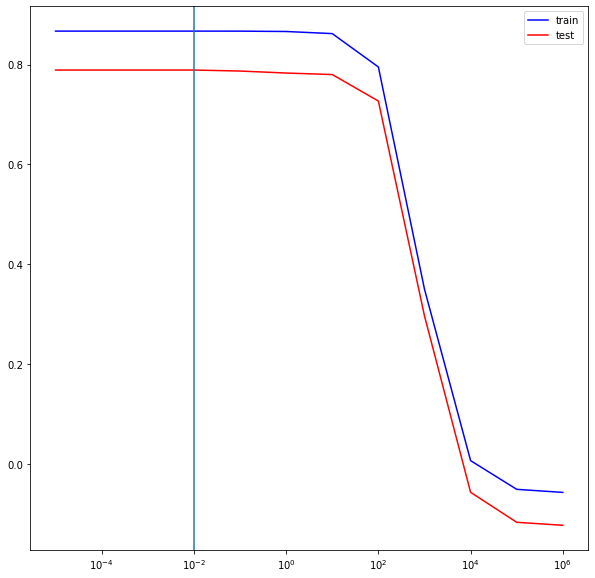

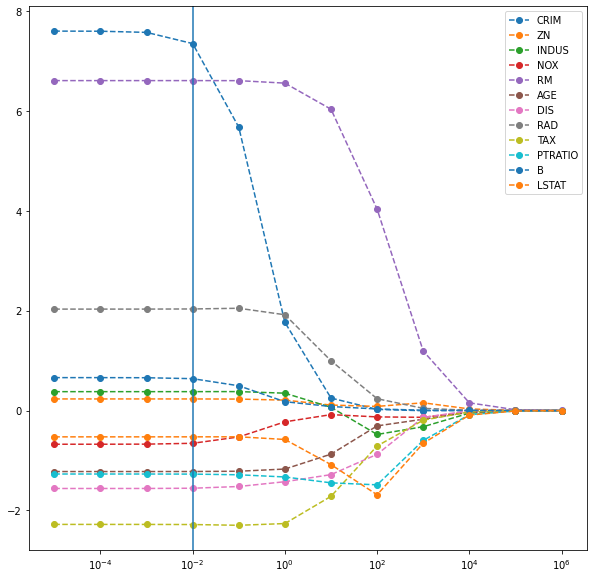

In [77]:
alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

get_best_regularizer('ridge',alpha_list, X_train,y_train,X_test,y_test)

## 2.2 Tuning alpha with cross validation

In [41]:
# alphas: list of values of alpha to fit the model. The best one is picked with cross-validation'

alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

# cv: define how to perform cross-validation
# auto: None >>> Leave-One-Out CV
# int >>> k-folds CV where the number of folds k is int\

cv = 10

# scoring:
# mse if cv is None (LOO-CV)
# R2 if cv is int (k-folds-CV)

ridge_cv = RidgeCV(alphas = alpha_list, cv = cv)

# apply CV on the whole dataset
ridge_cv.fit(X_scaled_clean_df,y_clean_df)

RidgeCV(alphas=array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02,
       1.e+03, 1.e+04, 1.e+05, 1.e+06]),
        cv=10)

In [42]:
train_R2 = get_adj_R2(ridge_cv,X_train,y_train)
test_R2 =  get_adj_R2(ridge_cv,X_test,y_test)

In [43]:
print('Best alpha found with {}-folds CV: {}'.format(cv,ridge_cv.alpha_))
print('Train adj R2: {:.3f}'.format(train_R2))
print('Test adj R2: {:.3f}'.format(test_R2))

Best alpha found with 10-folds CV: 10.0
Train adj R2: 0.861
Test adj R2: 0.799


## 2.3 Ridge + Poly Features

In [44]:
# function to preserve the columns names in the poly features transormation
# when applying poly features, scikit-learn returns an array where the columns names are lost


from sklearn.preprocessing import PolynomialFeatures

def PolynomialFeatures_labeled(input_df,degree, constant):
    '''Basically this is a cover for the sklearn preprocessing function. 
    The problem with that function is if you give it a labeled dataframe, it ouputs an unlabeled dataframe with potentially
    a whole bunch of unlabeled columns. 
    Inputs:
    input_df = Your labeled pandas dataframe (list of x's not raised to any power) 
    power = what order polynomial you want variables up to. (use the same power as you want entered into pp.PolynomialFeatures(power) directly)
    Ouput:
    Output: This function relies on the powers_ matrix which is one of the preprocessing function's outputs to create logical labels and 
    outputs a labeled pandas dataframe   
    '''
    poly = PolynomialFeatures(degree)
    output_nparray = poly.fit_transform(input_df)
    powers_nparray = poly.powers_
    
    if not constant:
        output_nparray = output_nparray[:,1:]

        powers_nparray = powers_nparray[1:,:]
        
        index = 0


    input_feature_names = list(input_df.columns)
   
    target_feature_names = []
    
    if constant:
        
        target_feature_names = ["Constant Term"]
        index = 1
        
    for feature_distillation in powers_nparray[index :]:
        intermediary_label = ""
        final_label = ""
        for i in range(len(input_feature_names)):
            if feature_distillation[i] == 0:
                continue
            else:
                variable = input_feature_names[i]
                power = feature_distillation[i]
                intermediary_label = "%s^%d" % (variable,power)
                if final_label == "":         #If the final label isn't yet specified
                    final_label = intermediary_label
                else:
                    final_label = final_label + " x " + intermediary_label
        target_feature_names.append(final_label)
        
    output_df = pd.DataFrame(output_nparray, columns = target_feature_names)
    
    return output_df

In [45]:
X_poly_df = PolynomialFeatures_labeled(X_scaled_clean_df, degree = 2, constant = False)

X_poly_df

,CRIM^1,ZN^1,INDUS^1,NOX^1,RM^1,AGE^1,DIS^1,RAD^1,TAX^1,PTRATIO^1,...,TAX^2,TAX^1 x PTRATIO^1,TAX^1 x B^1,TAX^1 x LSTAT^1,PTRATIO^2,PTRATIO^1 x B^1,PTRATIO^1 x LSTAT^1,B^2,B^1 x LSTAT^1,LSTAT^2
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,...,0.444367,0.972582,-0.294009,0.716979,2.128682,-0.643495,1.569246,0.194527,-0.474379,1.156834
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,...,0.974820,0.299254,-0.435464,0.486200,0.091866,-0.133680,0.149255,0.194527,-0.217191,0.242497
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,...,0.974820,0.299254,-0.391404,1.193412,0.091866,-0.120155,0.366358,0.157154,-0.479172,1.461022
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,...,1.223491,-0.125027,-0.460324,1.505994,0.012776,0.047040,-0.153895,0.173192,-0.566613,1.853728
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,...,1.223491,-0.125027,-0.487854,1.135429,0.012776,0.049853,-0.116028,0.194527,-0.452740,1.053705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.413229,-0.487722,0.115738,0.158124,0.439316,0.018673,-0.625796,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.311017,0.335861,1.384072,0.455547,-0.491936,0.149937,-0.161914,0.174847
331,-0.415249,-0.487722,0.115738,0.158124,-0.234548,0.288933,-0.716639,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.354258,0.402288,1.384072,0.518883,-0.589233,0.194527,-0.220901,0.250851
332,-0.413447,-0.487722,0.115738,0.158124,0.984960,0.797449,-0.773684,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.354258,0.789595,1.384072,0.518883,-1.156522,0.194527,-0.433575,0.966383
333,-0.407764,-0.487722,0.115738,0.158124,0.725672,0.736996,-0.668437,-0.982843,-0.803212,1.176466,...,0.645149,-0.944951,-0.323875,0.695020,1.384072,0.474380,-1.017998,0.162590,-0.348911,0.748747


Best alpha: 1.0
Best test R2: 0.455


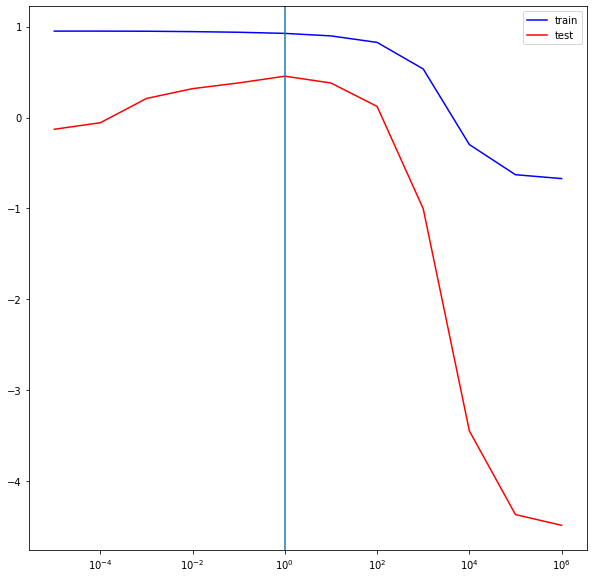

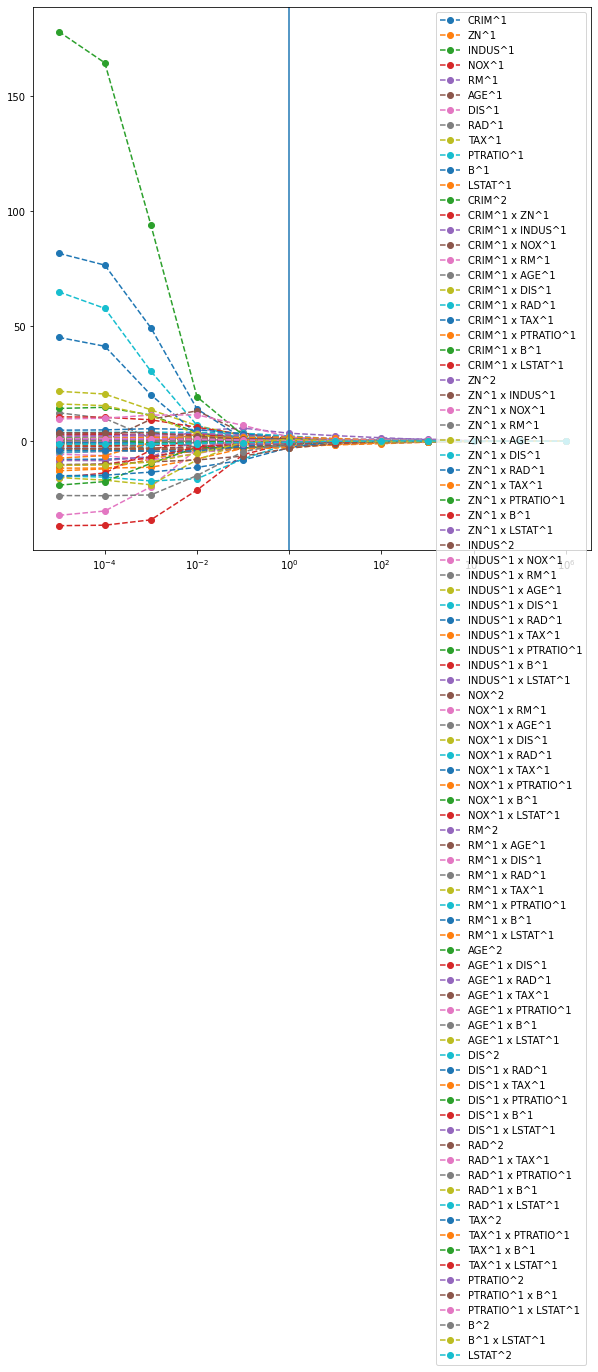

In [46]:
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly_df,y_clean_df, test_size = 0.33, random_state=42)


alpha_list = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

best_alpha = get_best_regularizer('ridge', alpha_list, X_train_poly,y_train,X_test_poly,y_test)


# 3. LASSO (penalty with L1 norm)

In [47]:
alpha = 0.1 # shrinkage penalty coefficient in the Ridge Loss

            # L =  sum_i(yi - B0 - sum_j (BjXj)) + alpha * sum_j (|Bj|)
    
            # increasing alpha leads to more coefficients set to 0
        
            # increasing alpha leads to a less flexible model with a little bit higher bias
            # but a lower variance >>> bias-variance trade-off
            # alpha should be chosen with cross-validation
            # at this first step we use the default value
            
            
lasso = Lasso( alpha = alpha)

In [48]:
lasso.fit(X_train,y_train)

Lasso(alpha=0.1)

In [49]:
# fitting a normal linear regression to compare the coefficients

lr = LinearRegression()

lr.fit(X_train,y_train)

LinearRegression()

In [51]:
features_lasso = []

for i in range(X_train.shape[1]):

    B_lasso = lasso.coef_[i]
    
    if B_lasso != 0:
        features_lasso.append(X_train.columns[i])
        
    B_lr = lr.coef_[0][i]
    
    fn = X_train.columns[i]
    
    print('Coefficient for feature {}: lr: {:.3f} - lasso: {:.3f}'.format(fn,B_ridge,B_lasso))

Coefficient for feature CRIM: lr: -0.526 - lasso: 0.000
Coefficient for feature ZN: lr: -0.526 - lasso: -0.000
Coefficient for feature INDUS: lr: -0.526 - lasso: 0.000
Coefficient for feature NOX: lr: -0.526 - lasso: 0.000
Coefficient for feature RM: lr: -0.526 - lasso: 6.739
Coefficient for feature AGE: lr: -0.526 - lasso: -0.976
Coefficient for feature DIS: lr: -0.526 - lasso: -0.984
Coefficient for feature RAD: lr: -0.526 - lasso: 0.000
Coefficient for feature TAX: lr: -0.526 - lasso: -1.480
Coefficient for feature PTRATIO: lr: -0.526 - lasso: -1.282
Coefficient for feature B: lr: -0.526 - lasso: 0.000
Coefficient for feature LSTAT: lr: -0.526 - lasso: -0.369


In [114]:
def get_lasso_dataset(X,y, alpha):
    
    lasso = Lasso( alpha = alpha)
    
    lasso.fit(X,y)
    
    
    features_lasso = []

    for i in range(X.shape[1]):

        B_lasso = lasso.coef_[i]
    
        if B_lasso != 0:
            
            features_lasso.append(X.columns[i])
        
    X_lasso = X[features_lasso]
    
    return X_lasso

In [115]:
X_train_lasso = get_lasso_dataset(X_train, y_train, alpha = alpha)
X_train_lasso

,RM,AGE,DIS,TAX,PTRATIO,LSTAT
168,0.454987,-1.770024,1.152560,-0.850726,-1.320292,-1.159667
39,-0.307205,-1.016140,0.915493,-1.040783,-0.256858,-0.434968
237,-0.610658,-0.941463,0.301364,-1.100176,0.066796,0.048631
104,-0.274438,0.953916,-0.592806,0.141134,-0.303094,0.621942
262,0.086000,-1.723795,1.917048,-0.298373,-1.690182,-1.076964
...,...,...,...,...,...,...
188,0.949344,0.708548,-0.443682,-0.601276,-0.488039,-0.412540
71,-0.585014,-1.137046,0.336351,-0.060801,0.113032,-0.498046
106,-0.508082,0.697880,-0.633164,0.141134,-0.303094,0.435511
270,1.617508,0.118242,-0.330782,-1.106115,-0.025677,-0.866703


In [116]:
adj_R2_train = get_adj_R2(lasso, X_train, y_train)
adj_R2_test = get_adj_R2(lasso,X_test, y_test)

print('Train adj R2 score: {:.3f}'.format(adj_R2_train))
print('Test adj R2 score: {:.3f}'.format(adj_R2_test))

Train adj R2 score: 0.861
Test adj R2 score: 0.774


# 3.1 Comparison LASSO - Backward Selection

In [117]:
import statsmodels.api as sm

# define a fucntion to perform backward selection

def backward_selection(X,y,alpha):
    
    # alpha: level of significance
    
    # set max p value to an arbitrary high number
    p_max = 1000
    
    # loop until max p value is higher than level of significance
    while (p_max > alpha):
    
        # fit the anove
        X_ANOVA = sm.add_constant(X)

        regressor_ANOVA = sm.OLS(endog = y,exog = X_ANOVA).fit()
        
        
        # get the p-values
        p_values = regressor_ANOVA.pvalues
    
        # find the max p value
        p_max = np.max(p_values)
   
        
        # drop the feature with the highest p-value
        p_max_index = np.where(p_values == p_max)[0][0]
        
        if p_max_index > 0:
            
            X = X.drop([X.columns[p_max_index - 1]], axis = 1)
                
    return X, regressor_ANOVA

In [118]:
#X_bs_df,_ = backward_selection(X_scaled_clean_df,y_clean_df, alpha = 0.04)
X_train_bs,_ = backward_selection(X_train,y_train, alpha = 0.05)

In [119]:
X_train_bs

,RM,AGE,DIS,PTRATIO
168,0.454987,-1.770024,1.152560,-1.320292
39,-0.307205,-1.016140,0.915493,-0.256858
237,-0.610658,-0.941463,0.301364,0.066796
104,-0.274438,0.953916,-0.592806,-0.303094
262,0.086000,-1.723795,1.917048,-1.690182
...,...,...,...,...
188,0.949344,0.708548,-0.443682,-0.488039
71,-0.585014,-1.137046,0.336351,0.113032
106,-0.508082,0.697880,-0.633164,-0.303094
270,1.617508,0.118242,-0.330782,-0.025677


In [120]:
X_train_lasso

,RM,AGE,DIS,TAX,PTRATIO,LSTAT
168,0.454987,-1.770024,1.152560,-0.850726,-1.320292,-1.159667
39,-0.307205,-1.016140,0.915493,-1.040783,-0.256858,-0.434968
237,-0.610658,-0.941463,0.301364,-1.100176,0.066796,0.048631
104,-0.274438,0.953916,-0.592806,0.141134,-0.303094,0.621942
262,0.086000,-1.723795,1.917048,-0.298373,-1.690182,-1.076964
...,...,...,...,...,...,...
188,0.949344,0.708548,-0.443682,-0.601276,-0.488039,-0.412540
71,-0.585014,-1.137046,0.336351,-0.060801,0.113032,-0.498046
106,-0.508082,0.697880,-0.633164,0.141134,-0.303094,0.435511
270,1.617508,0.118242,-0.330782,-1.106115,-0.025677,-0.866703


## 3.2 Tuning Alpha with validation set approach

Best alpha: 0.0001
Best test R2: 0.789


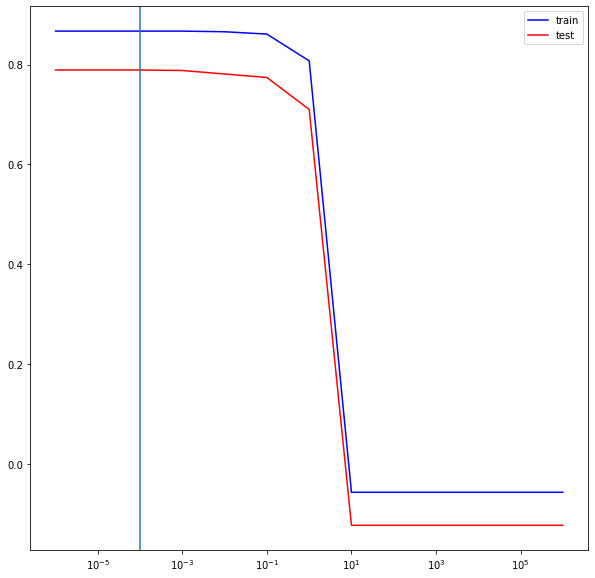

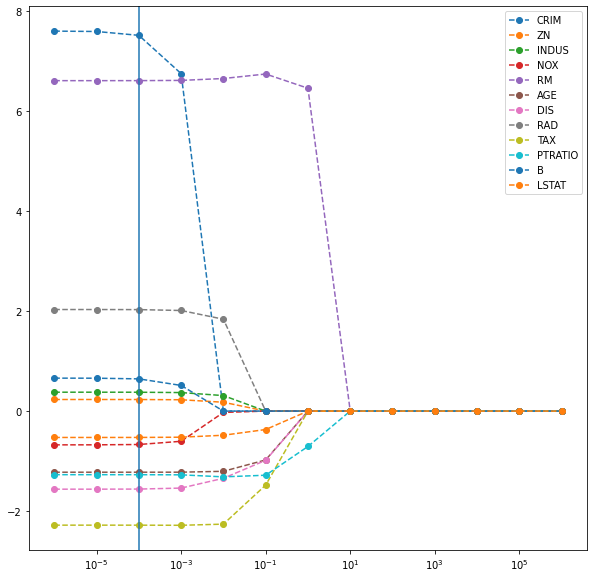

In [121]:
alpha_list = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

get_best_regularizer('lasso',alpha_list, X_train,y_train,X_test,y_test)

## 3.3  Best Lasso with k-folds CV

In [129]:
alpha_list = [1e-3,1e-2,1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

cv = 10

lasso_cv = LassoCV(alphas = alpha_list,  cv = cv)

# apply CV on the whole dataset
lasso_cv.fit(X_scaled_clean_df,y_clean_df)

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0, 100000.0,
                1000000.0],
        cv=10)

In [123]:
adj_R2_train = get_adj_R2(lasso_cv, X_train, y_train)
adj_R2_test = get_adj_R2(lasso_cv,X_test, y_test)

print('Best alpha: {}'.format(lasso_cv.alpha_))
print('Train adj R2 score: {:.3f}'.format(adj_R2_train))
print('Test adj R2 score: {:.3f}'.format(adj_R2_test))

Best alpha: 0.1
Train adj R2 score: 0.859
Test adj R2 score: 0.792


## 3.4 Lasso with Poly Features

### 3.4.1 Tuning alpha with validation set approach

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.56002030283614, tolerance: 1.5286787455357143
  positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 236.52895863822147, tolerance: 1.5286787455357143
  positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 232.5750904217582, tolerance: 1.5286787455357143
  positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_desce

Best alpha: 0.01
Best test R2: 0.433


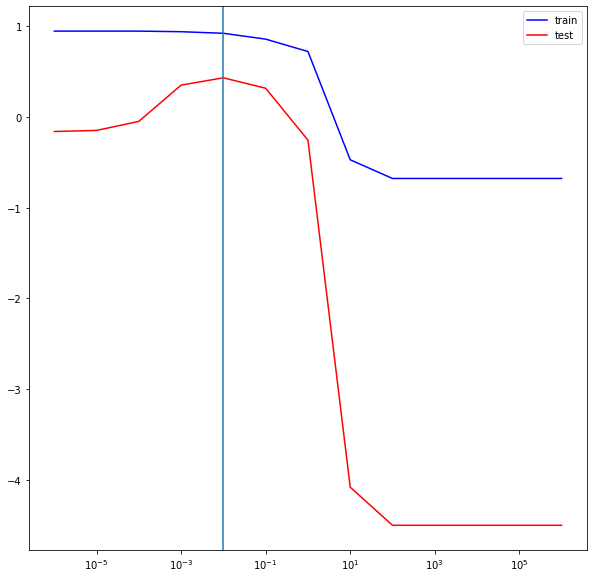

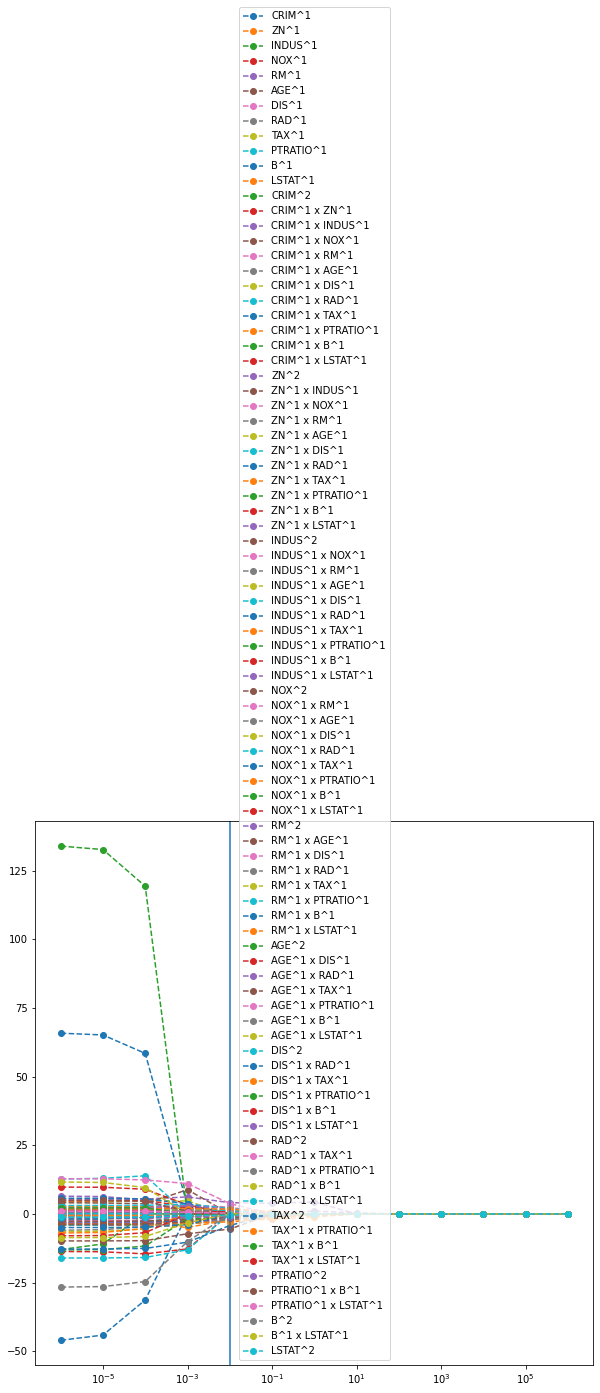

In [132]:
alpha_list = [1e-6,1e-5, 1e-4, 1e-3, 1e-2, 1e-1,1e0,1e1,1e2,1e3,1e4,1e5,1e6]

get_best_regularizer('lasso',alpha_list, X_train_poly,y_train,X_test_poly,y_test)

### 3.4.2 Tuning alpha with k-folds CV

In [134]:
lasso_cv_poly = LassoCV(alphas = alpha_list,  cv = cv)

# apply CV on the whole dataset
lasso_cv_poly.fit(X_poly_df,y_clean_df)

adj_R2_train = get_adj_R2(lasso_cv_poly, X_train_poly, y_train)
adj_R2_test = get_adj_R2(lasso_cv_poly,X_test_poly, y_test)

print('Best alpha: {:.3f}'.format(lasso_cv_poly.alpha_))
print('Train adj R2 score: {:.3f}'.format(adj_R2_train))
print('Test adj R2 score: {:.3f}'.format(adj_R2_test))

/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 121.90496824749562, tolerance: 1.9939450166112962
  tol, rng, random, positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 327.4273772802759, tolerance: 1.9939450166112962
  tol, rng, random, positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_mod

Best alpha: 0.100
Train adj R2 score: 0.853
Test adj R2 score: 0.432


/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 127.51323371250396, tolerance: 2.1020127019867547
  tol, rng, random, positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.9910494842123, tolerance: 2.1020127019867547
  tol, rng, random, positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:527: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 427.8239388503363, tolerance: 2.1020127019867547
  tol, rng, random, positive)
/opt/anaconda3/envs/tensorflow2.2_python3.7/lib/python3.7

### 3.4.3 Lasso with Poly Features-Comparison with Backward Selection)

In [146]:
X_train_poly_lasso = get_lasso_dataset(X_train_poly,y_train, alpha = 0.1)

X_train_poly_lasso

,RM^1,AGE^1,DIS^1,TAX^1,PTRATIO^1,LSTAT^1,ZN^1 x AGE^1,INDUS^2,INDUS^1 x NOX^1,INDUS^1 x AGE^1,...,RM^1 x AGE^1,RM^1 x RAD^1,RM^1 x PTRATIO^1,RM^1 x LSTAT^1,AGE^2,DIS^1 x TAX^1,DIS^1 x PTRATIO^1,DIS^1 x LSTAT^1,TAX^1 x PTRATIO^1,PTRATIO^1 x LSTAT^1
168,0.454987,-1.770024,1.152560,-0.850726,-1.320292,-1.159667,-3.694840,1.433876,1.589811,2.119508,...,-0.805338,-0.447181,-0.600716,-0.527633,3.132985,-0.980512,-1.521715,-1.336585,1.123206,1.531098
39,-0.307205,-1.016140,0.915493,-1.040783,-0.256858,-0.434968,0.495594,0.380352,0.568417,0.626680,...,0.312164,0.231302,0.078908,0.133625,1.032540,-0.952830,-0.235152,-0.398210,0.267333,0.111725
237,-0.610658,-0.941463,0.301364,-1.100176,0.066796,0.048631,-0.348971,0.371406,0.477461,0.573757,...,0.574911,0.459778,-0.040789,-0.029697,0.886352,-0.331553,0.020130,0.014656,-0.073487,0.003248
104,-0.274438,0.953916,-0.592806,0.141134,-0.303094,0.621942,-0.465246,0.027030,0.010929,-0.156831,...,-0.261791,0.111982,0.083181,-0.170685,0.909955,-0.083665,0.179676,-0.368691,-0.042777,-0.188507
262,0.086000,-1.723795,1.917048,-0.298373,-1.690182,-1.076964,-4.338185,1.685124,1.734691,2.237698,...,-0.148247,-0.044978,-0.145356,-0.092619,2.971470,-0.571995,-3.240160,-2.064592,0.504304,1.820265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,0.949344,0.708548,-0.443682,-0.601276,-0.488039,-0.412540,-0.345575,0.518864,0.296777,-0.510383,...,0.672655,-0.169097,-0.463317,-0.391642,0.502040,0.266776,0.216534,0.183037,0.293446,0.201336
71,-0.585014,-1.137046,0.336351,-0.060801,0.113032,-0.498046,0.554563,0.061037,-0.251180,-0.280915,...,0.665188,0.305963,-0.066125,0.291364,1.292873,-0.020451,0.038018,-0.167518,-0.006873,-0.056295
106,-0.508082,0.697880,-0.633164,0.141134,-0.303094,0.435511,-0.340372,0.027030,0.010929,-0.114737,...,-0.354580,0.207318,0.153997,-0.221275,0.487036,-0.089361,0.191908,-0.275750,-0.042777,-0.132001
270,1.617508,0.118242,-0.330782,-1.106115,-0.025677,-0.866703,0.109803,1.707929,0.933564,-0.154528,...,0.191258,-0.474061,-0.041532,-1.401900,0.013981,0.365883,0.008493,0.286690,0.028401,0.022254


In [148]:
X_train_poly_bs, anova_poly_bs = backward_selection(X_train_poly,y_train,alpha = 0.01) 

X_train_poly_bs

,ZN^1,AGE^1,PTRATIO^1,B^1,LSTAT^1,CRIM^1 x RM^1,CRIM^1 x RAD^1,CRIM^1 x B^1,CRIM^1 x LSTAT^1,ZN^1 x RAD^1,...,RM^1 x AGE^1,RM^1 x RAD^1,RM^1 x B^1,RM^1 x LSTAT^1,AGE^2,AGE^1 x TAX^1,DIS^2,DIS^1 x B^1,RAD^2,LSTAT^2
168,2.087452,-1.770024,-1.320292,0.219572,-1.159667,-0.190568,0.411657,-0.091966,0.485718,-2.051637,...,-0.805338,-0.447181,0.099902,-0.527633,3.132985,1.505805,1.328394,0.253070,0.965980,1.344827
39,-0.487722,-1.016140,-0.256858,0.358710,-0.434968,0.124799,0.305867,-0.145722,0.176701,0.367217,...,0.312164,0.231302,-0.110198,0.133625,1.032540,1.057581,0.838128,0.328396,0.566892,0.189197
237,0.370669,-0.941463,0.066796,0.350596,0.048631,0.235533,0.290404,-0.135226,-0.018757,-0.279085,...,0.574911,0.459778,-0.214094,-0.029697,0.886352,1.035774,0.090820,0.105657,0.566892,0.002365
104,-0.487722,0.953916,-0.303094,0.441052,0.621942,0.108312,0.161041,-0.174069,-0.245461,0.199011,...,-0.261791,0.111982,-0.121042,-0.170685,0.909955,0.134630,0.351418,-0.261458,0.166498,0.386812
262,2.516647,-1.723795,-1.690182,0.126813,-1.076964,-0.035518,0.215996,-0.052373,0.444778,-1.316210,...,-0.148247,-0.044978,0.010906,-0.092619,2.971470,0.514333,3.675074,0.243107,0.273531,1.159852
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,-0.487722,0.708548,-0.488039,0.384037,-0.412540,-0.359654,0.067480,-0.145491,0.156289,0.086873,...,0.672655,-0.169097,0.364583,-0.391642,0.502040,-0.426033,0.196854,-0.170391,0.031727,0.170190
71,-0.487722,-1.137046,0.113032,0.431842,-0.498046,0.240299,0.214827,-0.177382,0.204576,0.255080,...,0.665188,0.305963,-0.252633,0.291364,1.292873,0.069134,0.113132,0.145250,0.273531,0.248050
106,-0.487722,0.697880,-0.303094,-0.128985,0.435511,0.203527,0.163452,0.051669,-0.174456,0.199011,...,-0.354580,0.207318,0.065535,-0.221275,0.487036,0.098495,0.400897,0.081669,0.166498,0.189670
270,0.928623,0.118242,-0.025677,0.441052,-0.866703,-0.666067,0.120687,-0.181619,0.356896,-0.272162,...,0.191258,-0.474061,0.713405,-1.401900,0.013981,-0.130790,0.109417,-0.145892,0.085896,0.751175


In [149]:
anova_poly_bs.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 21 Feb 2021   Prob (F-statistic):          1.21e-109
Time:                        05:06:18   Log-Likelihood:                -442.94
No. Observations:                 224   AIC:                             955.9
Df Residuals:                     189   BIC:                             1075.
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                19.2276      0.915     21.019      0.000      17.423      21.032
ZN^1                 -4.7642      0.842     -5.659      0.000      -6.425      -3.104
AGE^1                -3.0275      0.512     -5.910      0.000      -4.038      -2.017
PTRATIO^1            -1.2217      0.228     -5.348      0.000      -1.672      -0.771
B^1                  25.4217      6.249      4.068      0.000      13.095      37.749
LSTAT^1              -8.8206      1.638     -5.386      0.000     -12.051      -5.590
CRIM^1 x RM^1       -15.2488      2.004     -7.607      0.000     -19.203     -11.295
CRIM^1 x RAD^1       38.1894      9.134      4.181      0.000      20.171      56.208
CRIM^1 x TAX^1        3.4196      1.272      2.688      0.008       0.910       5.929
CRIM^1 x B^1         82.9838     18.168      4.568      0.000      47.146     118.821
CRIM^1 x LSTAT^1    -19.6759      4.612     -4.266      0.000     -28.773     -10.579
ZN^1 x RAD^1         -6.4761      0.994     -6.517      0.000      -8.436      -4.516
ZN^1 x TAX^1          1.9904      0.523      3.809      0.000       0.960       3.021
ZN^1 x B^1            4.9535      1.525      3.249      0.001       1.946       7.961
INDUS^2               1.0323      0.315      3.280      0.001       0.412       1.653
INDUS^1 x AGE^1       1.5722      0.433      3.629      0.000       0.718       2.427
INDUS^1 x DIS^1       1.8605      0.629      2.956      0.004       0.619       3.102
INDUS^1 x LSTAT^1    -2.1436      0.395     -5.421      0.000      -2.924      -1.364
NOX^2                -1.6391      0.356     -4.610      0.000      -2.340      -0.938
NOX^1 x RM^1          1.9286      0.525      3.673      0.000       0.893       2.964
NOX^1 x RAD^1        -8.5571      1.591     -5.379      0.000     -11.695      -5.419
NOX^1 x TAX^1         5.3101      1.209      4.391      0.000       2.925       7.696
NOX^1 x PTRATIO^1    -0.9807      0.273     -3.587      0.000      -1.520      -0.441
NOX^1 x B^1         -12.9615      2.489     -5.208      0.000     -17.871      -8.052
NOX^1 x LSTAT^1       2.7860      0.672      4.146      0.000       1.460       4.112
RM^1 x AGE^1         -0.9206      0.268     -3.430      0.001      -1.450      -0.391
RM^1 x RAD^1         -4.5514      0.787     -5.780      0.000      -6.105      -2.998
RM^1 x B^1          -10.9942      1.952     -5.632      0.000     -14.845      -7.144
RM^1 x LSTAT^1       -3.7117      0.361    -10.268      0.000      -4.425      -2.999
AGE^2                -0.7616      0.213     -3.578      0.000      -1.182      -0.342
AGE^1 x TAX^1        -2.1662      0.607     -3.568      0.000      -3.364      -0.968
DIS^2                 1.1596      0.221      5.254      0.000       0.724       1.595
DIS^1 x B^1          -7.0799      1.386     -5.106      0.000      -9.815

In [160]:
count = 0

for fn_bs in X_train_poly_bs.columns:
    
    for fn_poly_lass in X_train_poly_lasso.columns:
        
        if fn_bs == fn_poly_lass:
            
            count +=1
            
print('% of features in poly lasso present also in poly backward selection: {}%'.format(100 * count/len(X_train_poly_lasso.columns)))

% of features in poly lasso present also in poly backward selection: 44.0%
